In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

dataset = pd.read_csv("delivery_data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14554 entries, 0 to 14553
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            14554 non-null  int64  
 1   SERVICETYPE           14340 non-null  object 
 2   VEHICLETYPE           14331 non-null  object 
 3   DEPARTURE_COUNTRY     14554 non-null  object 
 4   DEPARTURE_ZIPCODE     14548 non-null  float64
 5   ARRIVAL_COUNTRY       14554 non-null  object 
 6   ARRIVAL_ZIPCODE       14554 non-null  int64  
 7   SHIPPING_DATE         14554 non-null  object 
 8   GROSS_WEIGHT_KG       14554 non-null  float64
 9   NET_WEIGHT_KG         14554 non-null  float64
 10  VOLUME_M3             14554 non-null  float64
 11  DECLARED_DISTANCE_KM  11577 non-null  float64
 12  ACTUAL_DELIVERY_DATE  14554 non-null  object 
 13  DELIVERY_TIME_HH      14554 non-null  int64  
 14  WDAY                  14554 non-null  int64  
dtypes: float64(5), int6

In [14]:
#dataset['DECLARED_DISTANCE_KM'] 
dataset['ARRIVAL_ZIPCODE']


0        20121
1        15069
2        10036
3        70121
4        20090
         ...  
14549     7008
14550     7008
14551    63076
14552     7008
14553     7008
Name: ARRIVAL_ZIPCODE, Length: 14554, dtype: int64

In [15]:
delivery_time = dataset[["WDAY", "DELIVERY_TIME_HH"]]  # Seleziona le colonne corrette
delivery_time = delivery_time[delivery_time["DELIVERY_TIME_HH"] > 0]
delivery_time

,WDAY,DELIVERY_TIME_HH
24,1,193
27,1,48
28,1,48
29,1,48
30,1,48
...,...,...
14549,1,132
14550,1,72
14551,1,384
14552,1,72


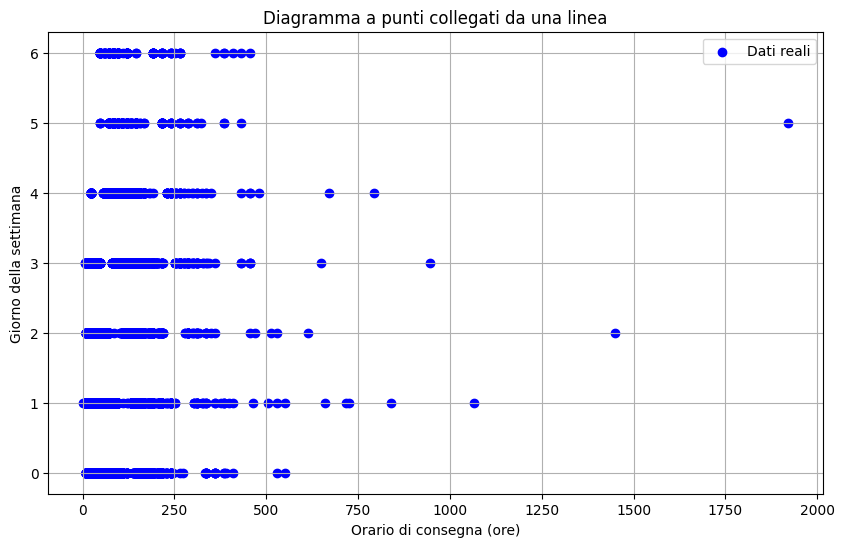

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supponiamo che il dataset sia già caricato
X = delivery_time['DELIVERY_TIME_HH'].values  # Orario di consegna
y = delivery_time['WDAY'].values  # Giorno della settimana

# Ordiniamo i dati per una migliore visualizzazione
sorted_indices = np.argsort(X)  
X_sorted = X[sorted_indices]
y_sorted = y[sorted_indices]

# Creiamo il diagramma a punti collegati da una linea
plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, y_sorted, color='blue', label='Dati reali')  # Punti
plt.title("Diagramma a punti collegati da una linea")
plt.xlabel("Orario di consegna (ore)")
plt.ylabel("Giorno della settimana")
plt.legend()
plt.grid()
plt.show()

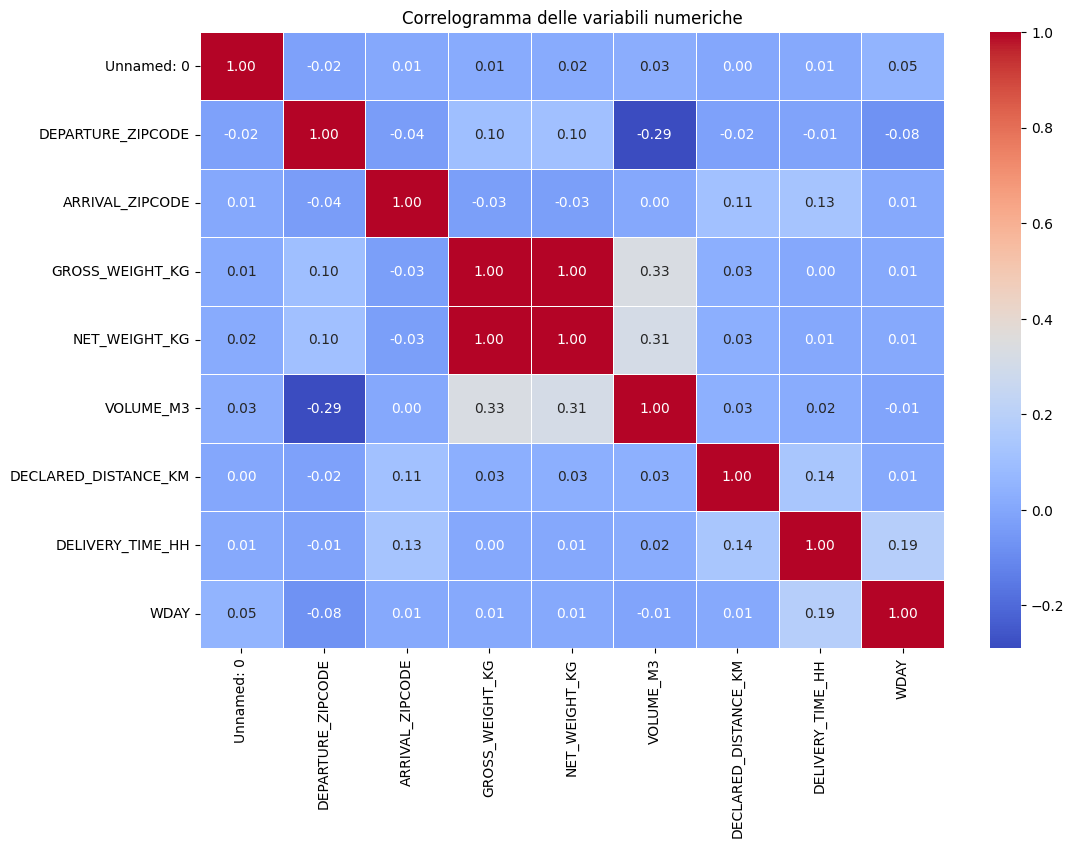

In [17]:
# Cell 8: Correlazioni e Correlogramma
# Filtriamo solo le colonne numeriche per calcolare la matrice di correlazione
numerical_dataset = dataset.select_dtypes(include=[np.number])  # Seleziona solo le colonne numeriche
correlation_matrix = numerical_dataset.corr()  # Calcoliamo la matrice di correlazione

# Visualizziamo la matrice di correlazione con una heatmap
plt.figure(figsize=(12, 8))  # Imposta la dimensione della figura
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Heatmap con annotazioni
plt.title("Correlogramma delle variabili numeriche")  # Titolo per la heatmap
plt.show()

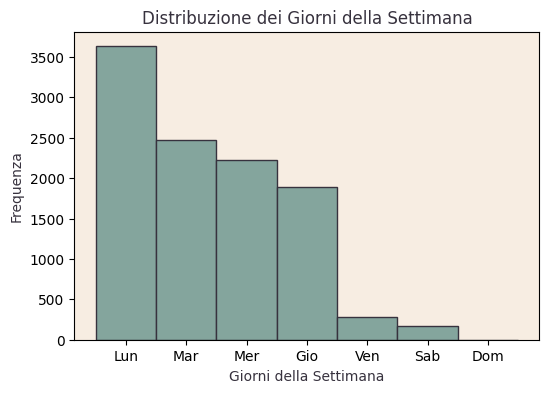

In [18]:
# Creazione del grafico
fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("white")
ax.set_facecolor("#F7EDE2")

# Creazione dell'istogramma
ax.hist(dataset["WDAY"], bins=np.arange(0.5, 8.5, 1), color="#84A59D", edgecolor="#37323E")

# Etichette per i giorni della settimana
ax.set_xticks(range(1, 8))
ax.set_xticklabels(["Lun", "Mar", "Mer", "Gio", "Ven", "Sab", "Dom"])

# Personalizzazione grafico
ax.set_xlabel("Giorni della Settimana", color="#37323E")
ax.set_ylabel("Frequenza", color="#37323E")
ax.set_title("Distribuzione dei Giorni della Settimana", color="#37323E")

# Mostrare il grafico
plt.show()

In [19]:
delivery_time = dataset[["WDAY", "DELIVERY_TIME_HH"]]  # Seleziona le colonne corrette
delivery_time = delivery_time[delivery_time["DELIVERY_TIME_HH"] > 0]
delivery_time

,WDAY,DELIVERY_TIME_HH
24,1,193
27,1,48
28,1,48
29,1,48
30,1,48
...,...,...
14549,1,132
14550,1,72
14551,1,384
14552,1,72


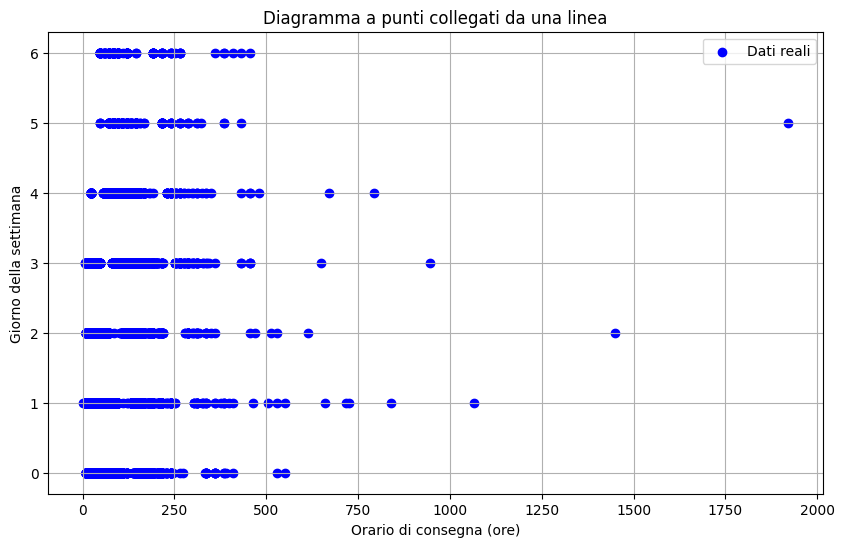

In [20]:
# Supponiamo che il dataset sia già caricato
X = delivery_time['DELIVERY_TIME_HH'].values  # Orario di consegna
y = delivery_time['WDAY'].values  # Giorno della settimana

# Ordiniamo i dati per una migliore visualizzazione
sorted_indices = np.argsort(X)  
X_sorted = X[sorted_indices]
y_sorted = y[sorted_indices]

# Creiamo il diagramma a punti collegati da una linea
plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, y_sorted, color='blue', label='Dati reali')  # Punti
plt.title("Diagramma a punti collegati da una linea")
plt.xlabel("Orario di consegna (ore)")
plt.ylabel("Giorno della settimana")
plt.legend()
plt.grid()
plt.show()

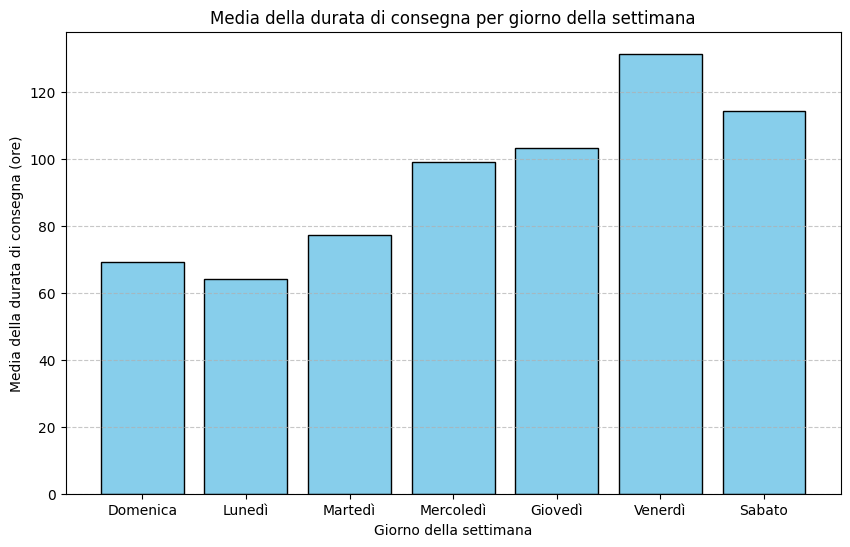

In [21]:
# Definiamo le variabili X e Y
X = delivery_time["WDAY"].values  # Giorno della settimana
Y = delivery_time["DELIVERY_TIME_HH"].values  # Orario di consegna

# Calcoliamo la media della durata di consegna per ogni giorno unico
unique_days = np.unique(X)  # Otteniamo i giorni unici
y_means = [Y[X == day].mean() for day in unique_days]  # Media delle consegne per ogni giorno

# Creiamo una figura e un oggetto Axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creiamo l'istogramma usando ax
ax.bar(unique_days, y_means, color='skyblue', edgecolor='black')

# Etichette e titolo
ax.set_title("Media della durata di consegna per giorno della settimana")
ax.set_xlabel("Giorno della settimana")
ax.set_ylabel("Media della durata di consegna (ore)")

# Lista dei giorni della settimana
days_of_week = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica']

# Impostiamo le etichette per l'asse X
ax.set_xticks(unique_days)
ax.set_xticklabels([days_of_week[day-1] for day in unique_days])  # Mappiamo i numeri ai giorni della settimana

# Aggiungiamo la griglia sull'asse Y
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostriamo il grafico
plt.show()

In [22]:
X_IT = IT["DEPARTURE_COUNTRY"].values
X_US = US["DEPARTURE_COUNTRY"].values
X_ITUS = ITUS["DEPARTURE_COUNTRY"].values
X_USIT = USIT["DEPARTURE_COUNTRY"].values

# Uniamo i paesi per tutti i 4 casi
unique_countries = np.unique(np.concatenate([X_IT, X_US, X_ITUS, X_USIT]))

# Calcoliamo il numero di occorrenze per ogni paese per ogni caso
IT_counts = [np.sum(X_IT == country) for country in unique_countries]
US_counts = [np.sum(X_US == country) for country in unique_countries]
ITUS_counts = [np.sum(X_ITUS == country) for country in unique_countries]
USIT_counts = [np.sum(X_USIT == country) for country in unique_countries]

# Creiamo un dizionario per mappare i paesi a numeri
country_to_index = {country: i for i, country in enumerate(unique_countries)}

# Creiamo una figura e un oggetto Axes
fig, ax = plt.subplots(figsize=(16, 6))

# Larghezza delle barre
width = 0.18  # Più stretta per fare 4 barre per ogni paese

# Indici numerici per i paesi
indices = np.arange(len(unique_countries))

# Creiamo il grafico a barre affiancate
ax.bar(indices - 1.5*width, IT_counts, width=width, color='skyblue', edgecolor='black', label='Italia -> Italia')
ax.bar(indices - 0.5*width, US_counts, width=width, color='orange', edgecolor='black', label='US -> US')
ax.bar(indices + 0.5*width, ITUS_counts, width=width, color='green', edgecolor='black', label='Italia -> US')
ax.bar(indices + 1.5*width, USIT_counts, width=width, color='red', edgecolor='black', label='US -> Italia')

# Etichette e titolo
ax.set_title("Numero di partenze per paese di origine (Italia vs Estero)")
ax.set_xlabel("Paese di partenza")
ax.set_ylabel("Numero di partenze")

# Impostiamo le etichette per l'asse X (usiamo i nomi dei paesi)
ax.set_xticks(indices)  # Imposta i valori dell'asse X usando gli indici
ax.set_xticklabels(unique_countries, rotation=45, ha='right')  # Mappiamo gli indici ai paesi

# Aggiungiamo la legenda
ax.legend()

# Aggiungiamo la griglia sull'asse Y
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostriamo il grafico
plt.show()

NameError: name 'IT' is not defined